# **Demo de uso de ImageAI con para detectar los objetos en una imagen con YOLO y luego reconocerlos con INCEPTION v3**
Basado en info de [https://imageai.readthedocs.io/en/latest/detection/index.html] y [https://imageai.readthedocs.io/en/latest/prediction/index.html]


0) Preparar el ambiente para usar el paquete ImageAI:



In [0]:
pip install imageAI

     |████████████████████████████████| 184kB 4.8MB/s 


1) Cargar Librerías:

In [0]:
# nota se debe indicar la versión 1 de TF para compatibilidad del código
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

from imageai.Detection import ObjectDetection
from imageai.Prediction import ImagePrediction
from IPython.display import Image, display
from PIL import Image as ImPIL
import numpy as np
import os

print("Librerías cargadas.")

Using TensorFlow backend.


Librerías cargadas.


2) Montar el Drive:


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# directorio local en Google Drive
path = 'gdrive/My Drive/IA/demoImageAI' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


3) Cargar modelo YOLO para detectar e INCEPTION para reconocer:

Nota: ya están bajados en la subcarpeta "models".

In [0]:
# carga modelo detectar objetos
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(path+"/models/yolo.h5")
detector.loadModel()
print("\n-Modelo YOLO cargado.")

# carga modelo para reconocer objetos
recognizer = ImagePrediction()
recognizer.setModelTypeAsInceptionV3()
recognizer.setModelPath(path+"/models/inception_v3_weights_tf_dim_ordering_tf_kernels.h5")
recognizer.loadModel()
print("\n\n-Modelo INCEPTION v3 cargado.")













Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
-Modelo YOLO cargado.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
-Modelo INCEPTION v3 cargado.


4) Cargar las imágenes a procesar:


*   Carga todas las imágenes de "testMany":


In [0]:
# levanta imágenes 
all_images_array = []
auxiPath = path + "/testMany"
all_files = os.listdir(auxiPath)
for each_file in all_files:
    if(each_file.endswith(".jpg") or each_file.endswith(".png")):
        all_images_array.append(auxiPath + "/" + each_file)

print(len(all_images_array), " imágenes cargadas.")



*   Define manualmente las imágenes a procesar:



In [0]:
all_images_array = []

all_images_array.append(path + "/testMany/animales.jpg")

print(len(all_images_array), " imágenes cargadas.")

1  imágenes cargadas.


5) Ejecutar los modelos sobre las imágenes cargadas y mostrar los resultados:

-----------------------------------------------------------------------------
*  gdrive/My Drive/IA/demoImageAI/testMany/animales.jpg


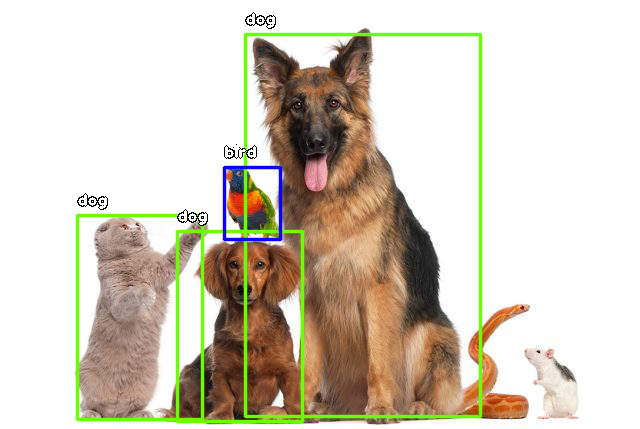


  objetos detectados:  4 





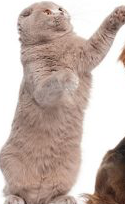

    - detecta  dog  :  93.7237024307251 % :  [77, 215, 202, 419]
    - reconoce  Egyptian_cat  :  36.50909960269928 %
    - reconoce  tiger_cat  :  29.088830947875977 %
    - reconoce  tabby  :  25.851130485534668 %




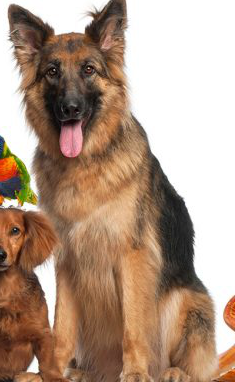

    - detecta  dog  :  95.83836793899536 % :  [245, 34, 480, 416]
    - reconoce  German_shepherd  :  99.99871253967285 %
    - reconoce  Norwegian_elkhound  :  0.00023022557797958143 %
    - reconoce  malinois  :  0.00021291041321092052 %




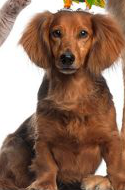

    - detecta  dog  :  99.21408295631409 % :  [177, 231, 302, 421]
    - reconoce  Saluki  :  28.675809502601624 %
    - reconoce  Irish_setter  :  27.513188123703003 %
    - reconoce  toy_terrier  :  19.572891294956207 %




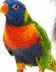

    - detecta  bird  :  55.23669719696045 % :  [224, 167, 280, 239]
    - reconoce  lorikeet  :  99.9864935874939 %
    - reconoce  coucal  :  0.010910580749623477 %
    - reconoce  jacamar  :  0.0001964963075806736 %
-----------------------------------------------------------------------------


In [0]:
# define la minima probabilidad que se va a usar para detectar objetos
minProbObjDet = 35

# procesalas imágenes cargadas
for each_image in all_images_array:
  
  print("-----------------------------------------------------------------------------") 
  print("* ", each_image)

  # procesa la imagen en el modelo YOLO previamente cargado
  # devolviendo un vector con los resultados 
  # nota: se podría hacer también que devuelva archivos (ver documentación)
  returned_img, detections_info, detections_img = detector.detectObjectsFromImage(
                                            input_image = each_image, # imagen a procesar
                                            minimum_percentage_probability = minProbObjDet, # mínima probabilidad para considerar objetos detectados 
                                            display_percentage_probability = minProbObjDet, # mínima probabilidad para mostrar objetos en nueva imagen
                                            display_object_name = True, # indica que se muestra los nombres de las clases en nueva imagen
                                            extract_detected_objects = True, # indica que se genera nuevas sub-imágenes con los objetos detectados
                                            output_type = "array") # indica que devuelve también un array con sub-imágenes con los objetos detectados 

  # muestra la imagen con los objetos detectados
  display( ImPIL.fromarray(returned_img, 'RGB') )
  print("\n  objetos detectados: ", len(detections_info), "\n")

  # muestra detalle de los objetos detectados
  for detection, det_obj in zip(detections_info, detections_img):    
      
      # convierte el formato de la subimagen
      auxiImg = ImPIL.fromarray(det_obj, 'RGB')  
      
      # ejecuta el modelo para reconocer sobre subimagen
      rec_results = recognizer.predictImage(auxiImg, # la subimagen a procesar
                                            input_type = 'array', # indica que la imagen es un vector, no un archivo
                                            result_count=3) # la cantidad máxima de resultados a devolver

      # muestra la imagen y los resultados
      print("\n")
      display( auxiImg )

      print("    - detecta ", detection["name"], " : ", detection["percentage_probability"], "% : ", detection["box_points"])

      for (eachRec, eachProb) in zip(rec_results[0], rec_results[1]):
        print("    - reconoce ", eachRec , " : " , eachProb, "%")
  
print("-----------------------------------------------------------------------------")